# Feature Engineering

Feature engineering is a crucial step in the data preprocessing pipeline, especially when preparing data for machine learning models. Models do not understand raw data in its original form, so we need to transform and create new features that can help the model learn better patterns.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
%%capture
!pip install -r requirements.txt 

In [1]:
# Executing this cell does some magic
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

d:\OneDrive\Personal_Things\My Website\My website HTML\backend\supplychainAPI


In [3]:
import pandas as pd
from features.src.feature_engineering_depDelay import FeatureEngineeringDepDelay

First, I think it is a good idea to reduce the number of samples in the dataset. The current dataset has 28 million samples. Before we train the model on the entire dataset, we will create a smaller dataset with 100K samples. This will help us to iterate faster and test our feature engineering ideas.

In [4]:
sample_df = pd.read_parquet("./data/sample_df_v3.parquet")

In [5]:
display(sample_df.head(), sample_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 24296413 to 14273568
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype                         
---  ------                       --------------   -----                         
 0   Origin                       100000 non-null  object                        
 1   Dest                         100000 non-null  object                        
 2   IATA_Code_Operating_Airline  100000 non-null  object                        
 3   DepDelayMinutes              99996 non-null   float64                       
 4   Distance                     100000 non-null  float64                       
 5   CRSElapsedTime               100000 non-null  float64                       
 6   arr_datetime                 100000 non-null  datetime64[ns]                
 7   dep_scheduled_congestion     100000 non-null  float64                       
 8   dep_snowfall                 100000 non-null  float32       

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,arr_datetime,dep_scheduled_congestion,dep_snowfall,dep_rain,...,arr_wind_speed_10m,arr_wind_gusts_10m,arr_cloud_cover_low,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,arr_scheduled_congestion
24296413,SEA,SMF,AS,10.0,605.0,115.0,2021-06-28 08:00:00,28.0,0.0,0.0,...,11.298495,24.840000,0.0,0.0,16.600000,15.752708,1006.069519,76.995392,1006.900024,17.0
8823672,DSM,DEN,UA,0.0,589.0,116.0,2019-09-15 18:00:00,9.0,0.0,0.0,...,15.188416,42.480000,0.0,100.0,28.400000,24.027100,840.228271,15.589545,1008.099976,75.0
4414927,LAS,IAH,UA,0.0,1222.0,176.0,2018-07-12 06:00:00,30.0,0.0,0.0,...,4.553679,12.240000,15.0,96.0,24.950001,30.735420,1014.556885,97.638939,1017.700012,24.0
13661256,AVP,ORD,ZW,0.0,632.0,140.0,2020-09-18 07:00:00,2.0,0.0,0.0,...,14.777550,26.280001,78.0,78.0,13.150000,10.006767,1003.583374,62.089584,1027.400024,75.0
6512103,OMA,MSP,OO,0.0,282.0,89.0,2019-02-08 16:00:00,8.0,0.0,0.0,...,10.787993,28.799999,0.0,0.0,-20.150000,-25.669867,1007.288574,70.699776,1041.900024,46.0


None

## What we can do for a better model?
### 1. Time Engineering
We can create new features from the existing ones. These new features can help the model to learn better patterns. We can seperate the time features from the datetime columns. We can specify the day of the week feature.For example, we can create a new feature called `is_weekend` which will be `1` if the flight is on Saturday or Sunday and `0` otherwise. We can account for peak hours of the day by creating a new feature called `is_peak_hour` which will be `1` if the flight is during peak hours (6 AM to 9 AM and 4 PM to 7 PM) and `0` otherwise.


In [15]:
sample_df.columns

Index(['Origin', 'Dest', 'IATA_Code_Operating_Airline', 'DepDelayMinutes',
       'Distance', 'CRSElapsedTime', 'arr_datetime', 'scheduled_congestion',
       'dep_snowfall', 'dep_rain', 'dep_precipitation', 'dep_wind_speed_10m',
       'dep_wind_gusts_10m', 'dep_cloud_cover_low', 'dep_cloud_cover',
       'dep_temperature_2m', 'dep_apparent_temperature',
       'dep_surface_pressure', 'dep_relative_humidity_2m', 'dep_pressure_msl',
       'dep_date_local', 'arr_date', 'arr_snowfall', 'arr_rain',
       'arr_precipitation', 'arr_wind_speed_10m', 'arr_wind_gusts_10m',
       'arr_cloud_cover_low', 'arr_cloud_cover', 'arr_temperature_2m',
       'arr_apparent_temperature', 'arr_surface_pressure',
       'arr_relative_humidity_2m', 'arr_pressure_msl'],
      dtype='object')

In [17]:
fe = FeatureEngineeringDepDelay(sample_df)
pd.set_option('display.max_columns', None)
df = fe.test_method()

You can see the updated dataframe below after applying the time feature engineering.

In [18]:
df[df['departure_weekday'] == 4].head()

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,scheduled_congestion,dep_snowfall,dep_rain,dep_precipitation,dep_wind_speed_10m,dep_wind_gusts_10m,dep_cloud_cover_low,dep_cloud_cover,dep_temperature_2m,dep_apparent_temperature,dep_surface_pressure,dep_relative_humidity_2m,dep_pressure_msl,arr_date,arr_snowfall,arr_rain,arr_precipitation,arr_wind_speed_10m,arr_wind_gusts_10m,arr_cloud_cover_low,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,departure_hour,departure_day,departure_month,departure_weekday,departure_is_weekend,departure_is_peak_hour,arrival_hour,arrival_day,arrival_month,arrival_weekday,arrival_is_weekend,arrival_is_peak_hour
13661256,AVP,ORD,ZW,0.0,632.0,140.0,2.0,0.0,0.0,0.0,12.964998,33.839996,43.0,51.0,13.900,12.535645,983.035950,86.590553,1016.599976,2020-09-18 07:00:00-06:00,0.0,0.0,0.0,14.777550,26.280001,78.0,78.0,13.150000,10.006767,1003.583374,62.089584,1027.400024,6,18,9,4,0,1,7,18,9,4,0,1
6512103,OMA,MSP,OO,0.0,282.0,89.0,8.0,0.0,0.0,0.0,1.484318,16.199999,0.0,0.0,-9.000,-13.216635,1002.522156,23.202473,1041.500000,2019-02-08 16:00:00-07:00,0.0,0.0,0.0,10.787993,28.799999,0.0,0.0,-20.150000,-25.669867,1007.288574,70.699776,1041.900024,15,8,2,4,0,0,16,8,2,4,0,1
1732242,CLT,ATL,DL,84.0,226.0,74.0,87.0,0.0,0.1,0.1,6.162207,19.080000,100.0,100.0,11.400,10.517733,992.219116,91.106125,1018.099976,2018-11-09 12:00:00-07:00,0.0,0.8,0.8,8.766573,15.480000,100.0,100.0,18.549999,19.920902,979.457886,93.024605,1014.599976,10,9,11,4,0,0,12,9,11,4,0,0
7521611,SFO,ACV,OO,0.0,250.0,71.0,57.0,0.0,0.0,0.0,11.874544,37.799999,4.0,7.0,19.354,19.428759,1013.881531,77.668938,1014.000000,2019-08-09 21:00:00-06:00,0.0,0.0,0.0,7.421590,14.759999,4.0,79.0,16.200001,16.491404,1007.244141,87.944130,1014.400024,20,9,8,4,0,0,21,9,8,4,0,0
3631681,STL,IAH,YX,0.0,667.0,140.0,20.0,0.0,0.0,0.0,8.557102,9.720000,0.0,100.0,19.250,21.499641,991.685669,100.000000,1010.599976,2018-05-18 20:00:00-06:00,0.0,0.0,0.0,15.937878,28.440001,0.0,2.0,26.400000,28.293854,1006.297363,70.921806,1009.400024,18,18,5,4,0,1,20,18,5,4,0,0


## Airline Engineering

IATA code by it own , does not provide much information to the model. However, we can extract some useful features from it. We can create a new feature that find the average departure delay for each airline, standard deviation of departure delays for each airline, etc. This will help the model to understand which airlines are more likely to have delays. In order to do this, we will create a new pkl file that contains flight statistics for each airline during training phase. During inference phase, we will load this pkl file and use it to create new features for the test data. The .pkl for the sample data has been already created and saved. 

In [21]:
import pickle

with open("./data/airline_stats.pkl", "rb") as f:
    airline_delay_stats = pickle.load(f)
airline_delay_stats

,average_delay,delay_stddev,on_time_rate
IATA_Code_Operating_Airline,,,
9E,10.058756,41.247613,0.862039
9K,2.307692,5.633007,0.846154
AA,13.927697,52.794590,0.797384
AS,7.989864,27.509865,0.833703
AX,21.306950,70.973095,0.750965
B6,19.921569,53.479986,0.716746
C5,23.076747,63.029553,0.735395
CP,14.738095,41.906921,0.794872
DL,9.373852,42.108308,0.848185


In [22]:
fe = FeatureEngineeringDepDelay(sample_df)
fe.test_method().head(2)

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,arr_datetime,dep_scheduled_congestion,dep_snowfall,dep_rain,dep_precipitation,dep_wind_speed_10m,dep_wind_gusts_10m,dep_cloud_cover_low,dep_cloud_cover,dep_temperature_2m,dep_apparent_temperature,dep_surface_pressure,dep_relative_humidity_2m,dep_pressure_msl,dep_date_local,arr_date,arr_snowfall,arr_rain,arr_precipitation,arr_wind_speed_10m,arr_wind_gusts_10m,arr_cloud_cover_low,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,arr_scheduled_congestion,average_delay,delay_stddev,on_time_rate
24296413,SEA,SMF,AS,10.0,605.0,115.0,2021-06-28 08:00:00,28.0,0.0,0.0,0.0,6.725354,7.920000,0.0,0.0,20.049999,21.273323,994.155151,79.275009,1007.900024,2021-06-28 06:00:00,2021-06-28 08:00:00-06:00,0.0,0.0,0.0,11.298495,24.84,0.0,0.0,16.6,15.752708,1006.069519,76.995392,1006.900024,17.0,7.989864,27.509865,0.833703
8823672,DSM,DEN,UA,0.0,589.0,116.0,2019-09-15 18:00:00,9.0,0.0,0.0,0.0,4.334974,12.599999,0.0,0.0,30.000000,33.580986,984.703918,57.510258,1013.900024,2019-09-15 17:00:00,2019-09-15 18:00:00-06:00,0.0,0.0,0.0,15.188416,42.48,0.0,100.0,28.4,24.027100,840.228271,15.589545,1008.099976,75.0,15.128977,55.574644,0.792409


## Airport Congestion Features

We can tweak the airport congestion features. We can create features that represent the congestion level, high medium, low, and we can add is_high_congestion. Here is the calculated quantiles for the departure and arrival congestion levels:

In [5]:
import pickle
with open("./data/quantailes.pkl", "rb") as f:
    quantiles = pickle.load(f)
quantiles

,dep_quantiles,arr_quantiles
0.25,11.0,10.0
0.75,60.0,60.0
0.90,98.0,100.0


Then, we can engineer the features as follows:

In [18]:
fe = FeatureEngineeringDepDelay(sample_df)
fe.test_method().head(2)

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,arr_datetime,dep_scheduled_congestion,dep_snowfall,dep_rain,...,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,arr_scheduled_congestion,is_high_dep_congestion,is_high_arr_congestion,dep_congestion_bucket,arr_congestion_bucket
24296413,SEA,SMF,AS,10.0,605.0,115.0,2021-06-28 08:00:00,28.0,0.0,0.0,...,16.6,15.752708,1006.069519,76.995392,1006.900024,17.0,0,0,1,1
8823672,DSM,DEN,UA,0.0,589.0,116.0,2019-09-15 18:00:00,9.0,0.0,0.0,...,28.4,24.027100,840.228271,15.589545,1008.099976,75.0,0,0,0,2


## Route features
We can create route features that represent the average departure delay for each route (origin-destination pair), standard deviation of departure delays for each route, etc. This will help the model to understand which routes are more likely to have delays. In order to do this, we will create a new pkl file that contains flight statistics for each route. That was calculated from the original dataset In this way. You can see the head of calculated route stats below:

In [6]:
import pickle
with open("./data/route_stats.pkl", "rb") as f:
  route_stats = pickle.load(f)

In [7]:
route_stats.head(2)

,average_route_delay,delay_route_stddev
route,,
ABE-ATL,10.047819,39.495374
ABE-BNA,25.553191,76.672076


Then, we can create new features based on these quantiles. You can see the updated dataframe below after applying the route feature engineering.

In [8]:
fe = FeatureEngineeringDepDelay(sample_df)
route_features = fe.test_method()

In [9]:
route_features[route_features['route'] == 'JFK-LAX'].head(2)

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,arr_datetime,dep_scheduled_congestion,dep_snowfall,dep_rain,...,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,arr_scheduled_congestion,route,average_route_delay,delay_route_stddev
513,JFK,LAX,UA,0.0,2475.0,377.0,2022-02-12 12:00:00,47.0,0.0,0.0,...,0.0,27.700001,23.942369,1015.117920,14.026085,1020.200012,68.0,JFK-LAX,11.578208,45.859902
845,JFK,LAX,AS,0.0,2475.0,399.0,2019-02-19 23:00:00,43.0,0.0,0.0,...,0.0,6.800000,3.350575,1014.540771,77.007629,1020.000000,43.0,JFK-LAX,11.578208,45.859902


In [11]:
route_features.columns

Index(['Origin', 'Dest', 'IATA_Code_Operating_Airline', 'DepDelayMinutes',
       'Distance', 'CRSElapsedTime', 'arr_datetime',
       'dep_scheduled_congestion', 'dep_snowfall', 'dep_rain',
       'dep_precipitation', 'dep_wind_speed_10m', 'dep_wind_gusts_10m',
       'dep_cloud_cover_low', 'dep_cloud_cover', 'dep_temperature_2m',
       'dep_apparent_temperature', 'dep_surface_pressure',
       'dep_relative_humidity_2m', 'dep_pressure_msl', 'dep_date_local',
       'arr_date', 'arr_snowfall', 'arr_rain', 'arr_precipitation',
       'arr_wind_speed_10m', 'arr_wind_gusts_10m', 'arr_cloud_cover_low',
       'arr_cloud_cover', 'arr_temperature_2m', 'arr_apparent_temperature',
       'arr_surface_pressure', 'arr_relative_humidity_2m', 'arr_pressure_msl',
       'arr_scheduled_congestion', 'log1p_DepDelayMinutes'],
      dtype='object')

## We can add interaction features

Sometimes a single feature is not enough. Delays often happen when *two things* happen together (example: **high congestion + heavy rain**).

a method called `_add_interaction_features()` has been added to creates a few useful combinations, like:
- `dep/arr congestion × precipitation / snowfall / wind gusts`
- `distance × bad weather` (long flights + bad conditions)
- `dep-arr weather differences` (temperature / humidity / pressure deltas)
- `gust_factor` (gustiness relative to average wind speed)

These features are meant to help the model capture “compound” effects that simple columns miss.

In [12]:
fe = FeatureEngineeringDepDelay(sample_df)
interaction = fe.test_method()

In [13]:
pd.set_option('display.max_columns', None)
interaction.head()

,Origin,Dest,IATA_Code_Operating_Airline,DepDelayMinutes,Distance,CRSElapsedTime,arr_datetime,dep_scheduled_congestion,dep_snowfall,dep_rain,dep_precipitation,dep_wind_speed_10m,dep_wind_gusts_10m,dep_cloud_cover_low,dep_cloud_cover,dep_temperature_2m,dep_apparent_temperature,dep_surface_pressure,dep_relative_humidity_2m,dep_pressure_msl,dep_date_local,arr_date,arr_snowfall,arr_rain,arr_precipitation,arr_wind_speed_10m,arr_wind_gusts_10m,arr_cloud_cover_low,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,arr_scheduled_congestion,dep_congestion_x_precipitation,dep_congestion_x_wind_gusts,dep_congestion_x_snowfall,arr_congestion_x_precipitation,arr_congestion_x_wind_gusts,arr_congestion_x_snowfall,distance_x_dep_precipitation,distance_x_dep_wind_gusts_10m,distance_x_dep_snowfall,distance_x_arr_precipitation,distance_x_arr_wind_gusts_10m,distance_x_arr_snowfall,temperature_delta,abs_temperature_delta,apparent_temperature_delta,abs_apparent_temperature_delta,humidity_delta,abs_humidity_delta,pressure_delta,abs_pressure_delta,cloud_cover_delta,abs_cloud_cover_delta,dep_gust_factor,arr_gust_factor,congestion_delta
24296413,SEA,SMF,AS,10.0,605.0,115.0,2021-06-28 08:00:00,28.0,0.0,0.0,0.0,6.725354,7.920000,0.0,0.0,20.049999,21.273323,994.155151,79.275009,1007.900024,2021-06-28 06:00:00,2021-06-28 08:00:00-06:00,0.0,0.0,0.0,11.298495,24.840000,0.0,0.0,16.600000,15.752708,1006.069519,76.995392,1006.900024,17.0,0.0,221.760002,0.0,0.0,422.280003,0.0,0.0,4791.600046,0.0,0.0,15028.200092,0.0,3.449999,3.449999,5.520615,5.520615,2.279617,2.279617,1.000000,1.000000,0.0,0.0,1.177633,2.198523,11.0
8823672,DSM,DEN,UA,0.0,589.0,116.0,2019-09-15 18:00:00,9.0,0.0,0.0,0.0,4.334974,12.599999,0.0,0.0,30.000000,33.580986,984.703918,57.510258,1013.900024,2019-09-15 17:00:00,2019-09-15 18:00:00-06:00,0.0,0.0,0.0,15.188416,42.480000,0.0,100.0,28.400000,24.027100,840.228271,15.589545,1008.099976,75.0,0.0,113.399995,0.0,0.0,3185.999966,0.0,0.0,7421.399663,0.0,0.0,25020.719730,0.0,1.600000,1.600000,9.553886,9.553886,41.920712,41.920712,5.800049,5.800049,-100.0,100.0,2.906591,2.796868,-66.0
4414927,LAS,IAH,UA,0.0,1222.0,176.0,2018-07-12 06:00:00,30.0,0.0,0.0,0.0,13.708391,20.160000,0.0,56.0,29.400000,30.768444,939.839600,53.578381,1010.000000,2018-07-12 00:00:00,2018-07-12 06:00:00-06:00,0.0,0.0,0.0,4.553679,12.240000,15.0,96.0,24.950001,30.735420,1014.556885,97.638939,1017.700012,24.0,0.0,604.799995,0.0,0.0,293.759995,0.0,0.0,24635.519814,0.0,0.0,14957.279720,0.0,4.449999,4.449999,0.033024,0.033024,-44.060558,44.060558,-7.700012,7.700012,-40.0,40.0,1.470632,2.687936,6.0
13661256,AVP,ORD,ZW,0.0,632.0,140.0,2020-09-18 07:00:00,2.0,0.0,0.0,0.0,12.964998,33.839996,43.0,51.0,13.900000,12.535645,983.035950,86.590553,1016.599976,2020-09-18 06:00:00,2020-09-18 07:00:00-06:00,0.0,0.0,0.0,14.777550,26.280001,78.0,78.0,13.150000,10.006767,1003.583374,62.089584,1027.400024,75.0,0.0,67.679993,0.0,0.0,1971.000051,0.0,0.0,21386.877686,0.0,0.0,16608.960434,0.0,0.750000,0.750000,2.528877,2.528877,24.500969,24.500969,-10.800049,10.800049,-27.0,27.0,2.610104,1.778373,-73.0
6512103,OMA,MSP,OO,0.0,282.0,89.0,2019-02-08 16:00:00,8.0,0.0,0.0,0.0,1.484318,16.199999,0.0,0.0,-9.000000,-13.216635,1002.522156,23.202473,1041.500000,2019-02-08 15:00:00,2019-02-08 16:00:00-07:00,0.0,0.0,0.0,10.787993,28.799999,0.0,0.0,-20.150000,-25.669867,1007.288574,70.699776,1041.900024,46.0,0.0,129.599991,0.0,0.0,1324.799965,0.0,0.0,4568.399677,0.0,0.0,8121.599785,0.0,11.150000,11.150000,12.453232,12.453232,-47.497303,47.497303,-0.400024,0.400024,0.0,0.0,10.914103,2.669635,-38.0


## Log1p Transformation

Finally, we can apply log1p transformation to the target variable (departure delay) to reduce the effect of long delays. This will help the model to learn better patterns. You can see the distribution of the target variable before and after applying log1p transformation below:

In [6]:
fe = FeatureEngineeringDepDelay(sample_df)
route_features = fe.test_method()

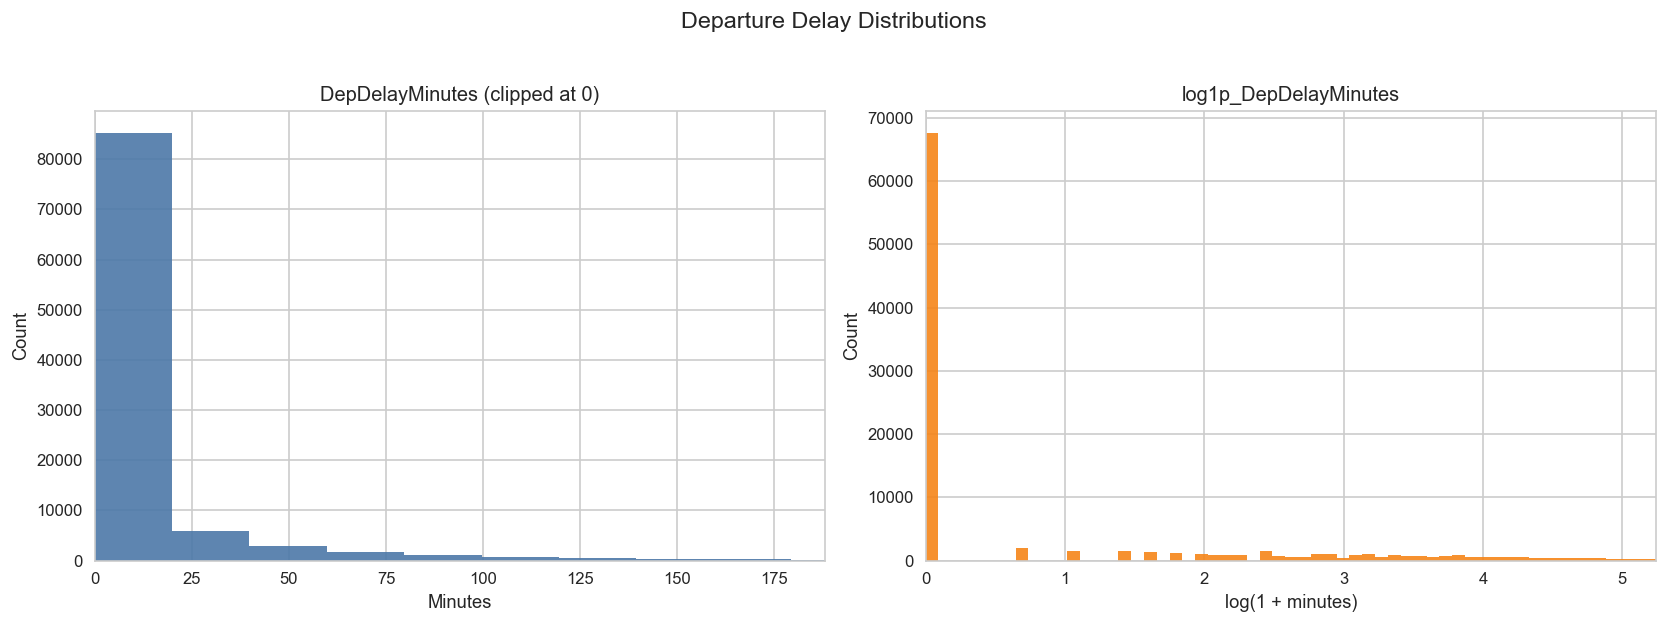

,metric,DepDelayMinutes,log1p_DepDelayMinutes
0,count,99996.000000,99996.000000
1,mean,12.674837,0.930897
2,median,0.000000,0.000000
3,p90,34.000000,3.555348
4,p99,188.000000,5.241747


In [10]:
# Beautiful distribution plots: DepDelayMinutes vs log1p_DepDelayMinutes
import numpy as np
import matplotlib.pyplot as plt

# Pick the dataframe you want to visualize (route_features is created above).
df_plot = route_features.copy()

raw_col = "DepDelayMinutes"
log_col = "log1p_DepDelayMinutes"

if raw_col not in df_plot.columns:
    raise KeyError(f"Missing column: {raw_col}")

# Handle negatives safely: log1p is only defined for x > -1, and delays are usually >= 0.
raw = pd.to_numeric(df_plot[raw_col], errors="coerce")
raw_nonneg = raw.clip(lower=0)
df_plot[log_col] = np.log1p(raw_nonneg)

# For readability, clip x-axes to the 99th percentile (keeps long tails from flattening the plot).
raw_p99 = float(np.nanpercentile(raw_nonneg, 99)) if raw_nonneg.notna().any() else 0.0
log_p99 = float(np.nanpercentile(df_plot[log_col], 99)) if df_plot[log_col].notna().any() else 0.0

# Plot
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=120)

axes[0].hist(raw_nonneg.dropna(), bins=80, color="#4C78A8", alpha=0.9)
axes[0].set_title("DepDelayMinutes (clipped at 0)")
axes[0].set_xlabel("Minutes")
axes[0].set_ylabel("Count")
if raw_p99 > 0:
    axes[0].set_xlim(0, raw_p99)

axes[1].hist(df_plot[log_col].dropna(), bins=80, color="#F58518", alpha=0.9)
axes[1].set_title("log1p_DepDelayMinutes")
axes[1].set_xlabel("log(1 + minutes)")
axes[1].set_ylabel("Count")
if log_p99 > 0:
    axes[1].set_xlim(0, log_p99)

fig.suptitle("Departure Delay Distributions", y=1.03, fontsize=14)
plt.tight_layout()
plt.show()

# Quick sanity stats
display(pd.DataFrame({
    "metric": ["count", "mean", "median", "p90", "p99"],
    raw_col: [
        raw_nonneg.count(),
        raw_nonneg.mean(),
        raw_nonneg.median(),
        np.nanpercentile(raw_nonneg, 90),
        np.nanpercentile(raw_nonneg, 99),
    ],
    log_col: [
        df_plot[log_col].count(),
        df_plot[log_col].mean(),
        df_plot[log_col].median(),
        np.nanpercentile(df_plot[log_col], 90),
        np.nanpercentile(df_plot[log_col], 99),
    ],
}))

## Final Dataframe

After taking so much effort in order to engineer useful features, here is how the final dataframe looks like:

In [19]:
fe = FeatureEngineeringDepDelay(sample_df)
engineered_df = fe.engineer_features()

In [20]:
pd.set_option('display.max_columns', None)
engineered_df.head(2)

,IATA_Code_Operating_Airline,Distance,CRSElapsedTime,dep_snowfall,dep_rain,dep_precipitation,dep_wind_speed_10m,dep_wind_gusts_10m,dep_cloud_cover_low,dep_cloud_cover,dep_temperature_2m,dep_apparent_temperature,dep_surface_pressure,dep_relative_humidity_2m,dep_pressure_msl,arr_date,arr_snowfall,arr_rain,arr_precipitation,arr_wind_speed_10m,arr_wind_gusts_10m,arr_cloud_cover_low,arr_cloud_cover,arr_temperature_2m,arr_apparent_temperature,arr_surface_pressure,arr_relative_humidity_2m,arr_pressure_msl,departure_hour,departure_day,departure_month,departure_weekday,departure_is_weekend,departure_is_peak_hour,arrival_hour,arrival_day,arrival_month,arrival_weekday,arrival_is_weekend,arrival_is_peak_hour,average_delay,delay_stddev,on_time_rate,is_high_dep_congestion,is_high_arr_congestion,dep_congestion_bucket,arr_congestion_bucket,route,average_route_delay,delay_route_stddev,log1p_DepDelayMinutes,dep_congestion_x_precipitation,dep_congestion_x_wind_gusts,dep_congestion_x_snowfall,arr_congestion_x_precipitation,arr_congestion_x_wind_gusts,arr_congestion_x_snowfall,distance_x_dep_precipitation,distance_x_dep_wind_gusts_10m,distance_x_dep_snowfall,distance_x_arr_precipitation,distance_x_arr_wind_gusts_10m,distance_x_arr_snowfall,temperature_delta,abs_temperature_delta,apparent_temperature_delta,abs_apparent_temperature_delta,humidity_delta,abs_humidity_delta,pressure_delta,abs_pressure_delta,cloud_cover_delta,abs_cloud_cover_delta,dep_gust_factor,arr_gust_factor,congestion_delta
0,AS,605.0,115.0,0.0,0.0,0.0,6.725354,7.920000,0.0,0.0,20.049999,21.273323,994.155151,79.275009,1007.900024,2021-06-28 08:00:00-06:00,0.0,0.0,0.0,11.298495,24.84,0.0,0.0,16.6,15.752708,1006.069519,76.995392,1006.900024,6,28,6,0,0,1,8,28,6,0,0,1,7.989864,27.509865,0.833703,0,0,1,1,SEA-SMF,15.164557,33.433604,2.397895,0.0,221.760002,0.0,0.0,422.280003,0.0,0.0,4791.600046,0.0,0.0,15028.200092,0.0,3.449999,3.449999,5.520615,5.520615,2.279617,2.279617,1.000000,1.000000,0.0,0.0,1.177633,2.198523,11.0
1,UA,589.0,116.0,0.0,0.0,0.0,4.334974,12.599999,0.0,0.0,30.000000,33.580986,984.703918,57.510258,1013.900024,2019-09-15 18:00:00-06:00,0.0,0.0,0.0,15.188416,42.48,0.0,100.0,28.4,24.027100,840.228271,15.589545,1008.099976,17,15,9,6,1,1,18,15,9,6,1,1,15.128977,55.574644,0.792409,0,0,0,2,DSM-DEN,14.571429,43.199041,0.000000,0.0,113.399995,0.0,0.0,3185.999966,0.0,0.0,7421.399663,0.0,0.0,25020.719730,0.0,1.600000,1.600000,9.553886,9.553886,41.920712,41.920712,5.800049,5.800049,-100.0,100.0,2.906591,2.796868,-66.0


This concludes the feature engineering step. The next step is to train the model using the engineered features.